<a href="https://colab.research.google.com/github/kkech/MachineLearningABCs/blob/part3/part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Intro to NN

Gradient Descent

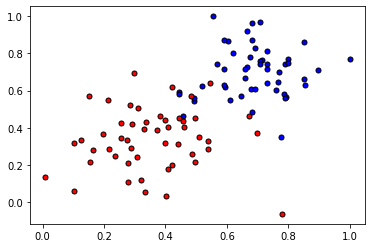

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Some helper functions for plotting and drawing lines

def plot_points(X, y):
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'blue', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'red', edgecolor = 'k')

def display(m, b, color='g--'):
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    x = np.arange(-10, 10, 0.1)
    plt.plot(x, m*x+b, color)

data = pd.read_csv('data.csv', header=None)
X = np.array(data[[0,1]])
y = np.array(data[2])
plot_points(X,y)
plt.show()

Implement the basic functions

- Output (prediction) formula

$$\hat{y} = \sigma(w_1 x_1 + w_2 x_2 + b)$$

- Error function

$$Error(y, \hat{y}) = - y \log(\hat{y}) - (1-y) \log(1-\hat{y})$$

- The function that updates the weights

$$ w_i \rightarrow w_i + \alpha (y - \hat{y}) x_i$$

$$ b \rightarrow b + \alpha (y - \hat{y})$$

- Sigmoid activation function

$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [48]:
# TODO: Implement the following functions

# Output formula (prediction)
def output_formula(features, weights, bias):
    pass

# Error formula (log-loss) 
def error_formula(y, output):
    pass

# Gradient descent step
def update_weights(x, y, weights, bias, learnrate):
    pass

# Activation function (sigmoid)
def sigmoid(x):
    pass

Training function


========== Epoch 0 ==========
Train loss:  0.6359812524827729
Accuracy:  0.51

========== Epoch 10 ==========
Train loss:  0.5591385066906528
Accuracy:  0.72

========== Epoch 20 ==========
Train loss:  0.5048929739936507
Accuracy:  0.82

========== Epoch 30 ==========
Train loss:  0.4619934987615625
Accuracy:  0.86

========== Epoch 40 ==========
Train loss:  0.4274529576544659
Accuracy:  0.93

========== Epoch 50 ==========
Train loss:  0.39919473924403354
Accuracy:  0.92

========== Epoch 60 ==========
Train loss:  0.3757270234292299
Accuracy:  0.93

========== Epoch 70 ==========
Train loss:  0.3559690568139173
Accuracy:  0.94

========== Epoch 80 ==========
Train loss:  0.3391282726547517
Accuracy:  0.94

========== Epoch 90 ==========
Train loss:  0.32461512628911093
Accuracy:  0.94


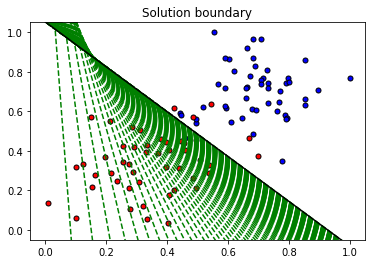

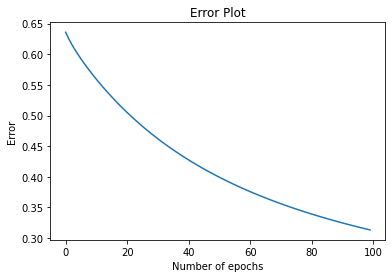

In [49]:
#### DO NOT MODIFY ANYTHING BELOW THIS LINE
np.random.seed(50)

epochs = 100
learnrate = 0.01

def train(features, targets, epochs, learnrate, graph_lines=False):
    
    errors = []
    n_records, n_features = features.shape
    last_loss = None
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)
    bias = 0
    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features, targets):
            output = output_formula(x, weights, bias)
            error = error_formula(y, output)
            weights, bias = update_weights(x, y, weights, bias, learnrate)
        
        # Printing out the log-loss error on the training set
        out = output_formula(features, weights, bias)
        loss = np.mean(error_formula(targets, out))
        errors.append(loss)
        if e % (epochs / 10) == 0:
            print("\n========== Epoch", e,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            predictions = out > 0.5
            accuracy = np.mean(predictions == targets)
            print("Accuracy: ", accuracy)
        if graph_lines and e % (epochs / 100) == 0:
            display(-weights[0]/weights[1], -bias/weights[1])
            

    # Plotting the solution boundary
    plt.title("Solution boundary")
    display(-weights[0]/weights[1], -bias/weights[1], 'black')

    # Plotting the data
    plot_points(features, targets)
    plt.show()

    # Plotting the error
    plt.title("Error Plot")
    plt.xlabel('Number of epochs')
    plt.ylabel('Error')
    plt.plot(errors)
    plt.show()

train(X, y, epochs, learnrate, True)

Student Admissions NN

In [50]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data[:10]

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


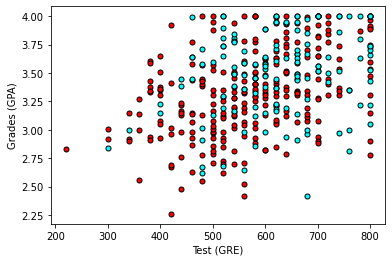

In [51]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

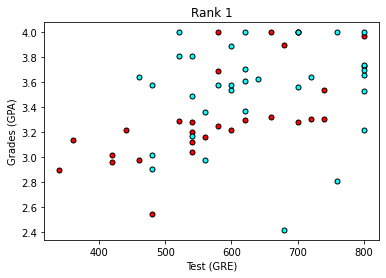

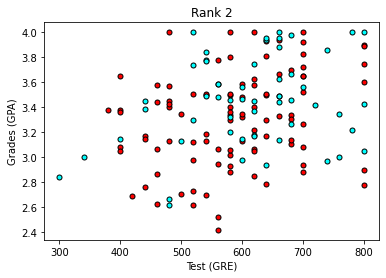

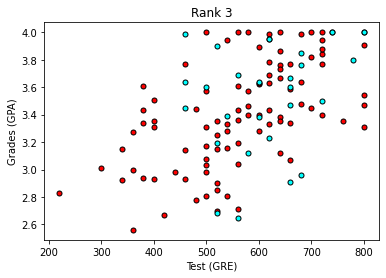

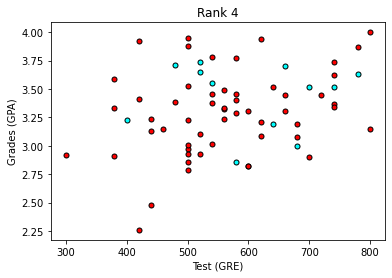

In [52]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

Implement the following

* Make dummy variables (HINT: Use pandas Get Dummies)

* Drop rank column






In [53]:
# TODO:  Make dummy variables for rank and concat existing columns
one_hot_data = pass

# TODO: Drop the previous rank column
one_hot_data = pass

# Print the first 10 rows of our data
one_hot_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


Implement the following

* Scale the data.
  * Normalize GPA in scale(0-1)
    * Find GPA MAX
    * Divide GPA column with GPA MAX
  * Normalize GRE in scale(0-1)
    * Find GRE MAX
    * Divide GRE column with GRE MAX

In [54]:
# Making a copy of our data
processed_data = one_hot_data[:]

# TODO: Scale the columns

# Printing the first 10 rows of our procesed data
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


In [55]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
318      1  0.600  0.9275       0       0       0       1
379      0  0.675  0.6750       0       1       0       0
89       1  0.825  1.0000       0       1       0       0
202      1  0.875  1.0000       1       0       0       0
231      0  0.750  0.8200       0       0       1       0
213      0  0.800  0.8450       0       0       1       0
222      1  0.600  0.7550       1       0       0       0
100      0  0.425  0.7875       0       0       1       0
337      0  0.775  0.7725       0       0       0       1
151      0  0.500  0.8450       0       1       0       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
0       0  0.475  0.9025       0       0       1       0
6       1  0.700  0.7450       1       0       0       0
26      1  0.775  0.9025       1       0       0       0
49      0  0.500  0.8375       0       0       1       0
60      1  

In [56]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

       gre     gpa  rank_1  rank_2  rank_3  rank_4
318  0.600  0.9275       0       0       0       1
379  0.675  0.6750       0       1       0       0
89   0.825  1.0000       0       1       0       0
202  0.875  1.0000       1       0       0       0
231  0.750  0.8200       0       0       1       0
213  0.800  0.8450       0       0       1       0
222  0.600  0.7550       1       0       0       0
100  0.425  0.7875       0       0       1       0
337  0.775  0.7725       0       0       0       1
151  0.500  0.8450       0       1       0       0
318    1
379    0
89     1
202    1
231    0
213    0
222    1
100    0
337    0
151    0
Name: admit, dtype: int64


In [57]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

Chain Rule

* Forward propagation and evaluation

$$x = \alpha_1$$
$$z_1 = w_1*x + b$$
$$a_2 = \sigma(z_1)$$

* Find Cost
  * MSE
  * e.t.c.

* Backpropagation -> aims to minimize the cost function by adjusting network’s weights and biases.
  * Compute Gradients using ***chain rule.***
  * Update weights and bias.


Implement Error Term Formula

$$ (y-\hat{y}) \sigma'(x) $$

In [64]:
# TODO: Write the error term formula.
def error_term_formula(x, y, output):
    pass

In [59]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(50)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Epoch: 0
Train loss:  0.24614765157225038
Epoch: 100
Train loss:  0.21964922663772599
Epoch: 200
Train loss:  0.21253334976978963
Epoch: 300
Train loss:  0.21005400436276464
Epoch: 400
Train loss:  0.2090074254410276
Epoch: 500
Train loss:  0.2084860701630363
Epoch: 600
Train loss:  0.20818484563349346
Epoch: 700
Train loss:  0.20798434808414154
Epoch: 800
Train loss:  0.20783277883932152
Epoch: 900
Train loss:  0.2077061734151387
Finished training!
Prediction accuracy: 0.725


Using Keras

In [60]:
import keras

sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

# Separate data and one-hot encode the output
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras
features = np.array(train_data.drop('admit', axis=1))
targets = np.array(keras.utils.to_categorical(train_data['admit'], 2))
features_test = np.array(test_data.drop('admit', axis=1))
targets_test = np.array(keras.utils.to_categorical(test_data['admit'], 2))

print(features[:10])
print(targets[:10])

Number of training samples is 360
Number of testing samples is 40
     admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
150      1  1.000  0.9350       1       0       0       0
269      0  0.625  0.7025       0       0       1       0
89       1  0.825  1.0000       0       1       0       0
133      0  0.625  0.7700       0       0       1       0
115      0  0.775  0.9975       0       0       1       0
310      0  0.700  1.0000       0       0       1       0
227      0  0.675  0.7550       0       0       0       1
160      0  0.750  0.7825       0       1       0       0
272      1  0.850  0.9175       0       1       0       0
349      0  0.775  0.7125       0       1       0       0
    admit    gre     gpa  rank_1  rank_2  rank_3  rank_4
0       0  0.475  0.9025       0       0       1       0
6       1  0.700  0.7450       1       0       0       0
26      1  0.775  0.9025       1       0       0       0
49      0  0.500  0.8375       0       0       1       0
51      0  

In [61]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(6,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.1))
model.add(Dense(2, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 130       
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Training the model
model.fit(features, targets, epochs=200, batch_size=100, verbose=0)

In [63]:
# Evaluating the model on the training and testing set
score = model.evaluate(features, targets)
print("\n Training Accuracy:", score[1])
score = model.evaluate(features_test, targets_test)
print("\n Testing Accuracy:", score[1])

360/360 [==============================] - 0s 105us/step

 Training Accuracy: 0.7111111283302307
40/40 [==============================] - 0s 65us/step

 Testing Accuracy: 0.699999988079071
